
## NYC High School SAT Scores Exploration
Guided project from Dataquest (dataquest.io) to investigate correlations and trends for NYC SAT scores

#### Data sets include a survey from different NYC schools as well as;
- AP courses
- Class sizes
- Graduation data
- High school directory information
- SAT results

#### Project performs the following tasks:
- Importing different file types
- Data cleaning, joining data frames and data transformations
- Data visualizations
- Analysis notes

In [1]:
# import required packages
import pandas as pd
import numpy
import re # this imports the 'regular expressions' package
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# create a list of all the data file names for import
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

# initialize an empty dictionary
data = {}

# create a for loop that reads each csv file into a dictionary called data
# the format method completes the path to each csv file
# the key is generated using the .replace method which takes each csv filename and removes the '.csv'
for name in data_files:
    d = pd.read_csv("schools/{0}".format(name))
    data[name.replace(".csv", "")] = d # this loads the data set into a dictionary with a key name
    
# result is a dictionary called 'data' where each filename is a key to the dataframe.

In [3]:
# check a couple of the dataframes to see that they loaded correctly
print(data['sat_results'].head(), '\n')
print(data['class_size'].info())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

### Initial impressions of the data set
The DBN is a unique identifier for each school.  The DBN can be used for joining the different dataframes. 

## Read in the surveys data
Surveys are tab delimited and encoded with Windows-1252 encoding. Need to specify tab delimited and the encoding.

In [4]:
# Surveys are tab delimited text files.
# There are two surveys that need to be concatenated together
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

# look at the size of the dataframe
print(survey.shape, "\n")

# view first five rows
survey.head()

(1702, 2773) 



,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Survey Dataframe notes
- Contains over 2,000 columns.  These will be filtered to columns of interest
- The 'dbn' column will be converted to 'DBN' for consistency
- Survey notes will be imported and displayed below as a handy reference.

In [5]:
# read in the survey notes
survey_desc_file_path = 'schools/Survey_Dictionary.csv'

# Skip the first 3 rows (0-indexed), use the 4th row as the header, and specify column names
survey_notes = pd.read_csv(survey_desc_file_path, skiprows=3, nrows=32,usecols =['Field Name', 'Field Description'])

# convert the 'dbn' to 'DBN' in the notes df
survey_notes.replace('dbn', 'DBN', inplace=True)

# create a variable to display the relevant survey fields
survey_display = survey_notes.head(40)

survey_display # display the fields

,Field Name,Field Description
0,DBN,School identification code (district borough n...
1,sch_type,"School type (Elementary, Middle, High, etc)"
2,location,School name
3,enrollment,Enrollment size
4,borough,Borough
5,principal,Principal name
6,studentsurvey,Only students in grades 6-12 partipate in the ...
7,rr_s,Student Response Rate
8,rr_t,Teacher Response Rate
9,rr_p,Parent Response Rate


#### Survey Fields
- The survey data will be filtered by the fields shown below.
- These fields provide aggregate survey on school safety, academic performance and other  factors.
- Parents, teachers and students responses are part of the survey

In [6]:
# create a column with capitalized "DBN", 'District Borough Number'
survey["DBN"] = survey["dbn"]

# survey fields to filter by
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]


# subset the survey database to just the columns of interest defined by 'survey_fields'
survey = survey.loc[:,survey_fields]

# add survey dataframe to the data dictionary
data["survey"] = survey

# check the survey data
print(data['survey'].info())
data['survey'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 1702 entries, 0 to 55
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DBN         1702 non-null   object 
 1   rr_s        1041 non-null   float64
 2   rr_t        1702 non-null   int64  
 3   rr_p        1702 non-null   int64  
 4   N_s         1036 non-null   float64
 5   N_t         1700 non-null   float64
 6   N_p         1696 non-null   float64
 7   saf_p_11    1696 non-null   float64
 8   com_p_11    1696 non-null   float64
 9   eng_p_11    1696 non-null   float64
 10  aca_p_11    1696 non-null   float64
 11  saf_t_11    1700 non-null   float64
 12  com_t_11    1700 non-null   float64
 13  eng_t_11    1700 non-null   float64
 14  aca_t_11    1700 non-null   float64
 15  saf_s_11    1036 non-null   float64
 16  com_s_11    1036 non-null   float64
 17  eng_s_11    1036 non-null   float64
 18  aca_s_11    1036 non-null   float64
 19  saf_tot_11  1702 non-null   float6

C:\Users\ptbea\AppData\Local\Temp\ipykernel_23680\1679055274.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  survey["DBN"] = survey["dbn"]


,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


### Add 'DBN' columns to all datasets
- 'class_size' doesn't have a DBN
- The DBN is made up of the CSD and School code, with a zero needed in front of the number

In [7]:
# Create a 'DBN' column in hs_directory dataframe to match the 'dbn' data
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

# function to pad a zero to the csd number in 'class_size' dataframe
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

data['class_size'].iloc[:, -4:].head() # check that 'DBN column has been added'

,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,ATS,NaN,01,01M015
1,ATS,NaN,01,01M015
2,ATS,NaN,01,01M015
3,ATS,NaN,01,01M015
4,ATS,NaN,01,01M015


# Convert columns to numeric
- Work through the various datasets and convert values to numeric where it makes sense
- For example, need to convert the SAT scores from string to numeric data types

In [8]:
# specify columns to be converted to numeric
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

# create loop to perform the operation
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")
    
    
# sum the SAT scores for each student into a new column 'sat_score'
data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]


data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


## Geographic and Location Data
- Examine and parse the longitude and latitude data for the schools in the 'hs_directory' dataframe

In [9]:
# This code extracts the latitute and longitude coordinates from the hs_directly dataframe

def find_lat(loc):
    
    # regular expression that matches a string with a comma inside parentheses
    coords = re.findall("\(.+, .+\)", loc)
    
    # take first element of coords, split into two elements with the comma, take the first element.
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    
    # note that find_lon function takes the second element
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

# use the series apply method to perform the function on the desired column and assign to a new function 'lat'
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

# convert to numerical data
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

data['hs_directory'][['lat', 'lon']].head() # check to see it looks correct

,lat,lon
0,40.670299,-73.961648
1,40.827603,-73.904475
2,40.842414,-73.916162
3,40.710679,-74.000807
4,40.718810,-73.806500


# Condense datasets
Some datasets do do not have rows with unique DBN, which is needed in order to combine with the sat_results dataset.

## class_size dataset
- class_size has multiple grades and programs.
- plan is to filter on the grade '9-12' (high-school) and program 'GEN ED' which is the largest category 

In [10]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [11]:
# Need to filter 'class_size' on the numeric class size columns for aggregation operation.
class_size = class_size.iloc[:,-9:]
class_size.head()

,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


In [12]:
# remove unnecessary columns for the analysis
class_size = class_size.drop(['DATA SOURCE','padded_csd'], axis=1).reset_index()
class_size.head()

,index,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,225,63.0,3.0,21.0,19.0,25.0,NaN,01M292
1,226,79.0,3.0,26.3,24.0,31.0,NaN,01M292
2,227,38.0,2.0,19.0,16.0,22.0,NaN,01M292
3,228,69.0,3.0,23.0,13.0,30.0,NaN,01M292
4,229,53.0,3.0,17.7,16.0,21.0,NaN,01M292


In [13]:
# now group by the 'DBN' value, and aggregate the different class sizes by the mean
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)


# assign back to the dataframe within the 'data' dictionary
data["class_size"] = class_size

data['class_size'].head()  # should see unique 'DBN' values

,DBN,index,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,232.142857,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,295.500000,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,354.000000,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,363.500000,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,404.000000,57.6000,2.733333,21.200000,19.40,22.866667,NaN


## Data Demographics and Graduation Data Sets
- These datasets also need to be condensed to have unique DBN

In [14]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [15]:
# In data demographics, only schoolyear has multiple instances of the DBN value
# filter by value '20112012'
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]


# Demographic and Cohort columns need to be filtered for a unique DBN
# Choose most recent cohort, '2006' and the 'Total Cohort' in demographics
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

## Convert AP scores to numeric

In [16]:
# col list for converting to numeric
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Combine the datasets
- Datasets are now ready to be combined
- Use .merge() to combine the dataset
- 'ap_2010' and 'graduation' have missing DBN values, so perform initial 'left' join on these to the 'sat_results'

In [17]:
# establish the 'combined' dataset with the 'sat_results'
combined = data["sat_results"]

# left join 'ap_2010' and 'graduation' to 'sat_results'
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

# create list of data frames for inner join
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

# loop to inner join data sets to 'combined'
for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

print(combined.shape)

(363, 159)


### Add a school district column for mapping

In [19]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

### Combined Data Set has missing values and non-numeric columns
- Filter for the numeric columns to perform analysis
- Perform a fill operation to values with the mean of the column
- Perform the correlation function on the data

In [20]:
# filter by numeric columns for correlation study
numeric_combined = combined.select_dtypes(include='number')

# fill NaN with the mean of each column
numeric_combined = numeric_combined.fillna(numeric_combined.mean())

# all other values, vill with zero
numeric_combined = numeric_combined.fillna(0)

print(numeric_combined.info())

# create correlation matrix
correlations = numeric_combined.corr()

correlations.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SAT Critical Reading Avg. Score       363 non-null    float64
 1   SAT Math Avg. Score                   363 non-null    float64
 2   SAT Writing Avg. Score                363 non-null    float64
 3   sat_score                             363 non-null    float64
 4   AP Test Takers                        363 non-null    float64
 5   Total Exams Taken                     363 non-null    float64
 6   Number of Exams with scores 3 4 or 5  363 non-null    float64
 7   Total Cohort                          363 non-null    float64
 8   index                                 363 non-null    float64
 9   NUMBER OF STUDENTS / SEATS FILLED     363 non-null    float64
 10  NUMBER OF SECTIONS                    363 non-null    float64
 11  AVERAGE CLASS SIZE 

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,index,NUMBER OF STUDENTS / SEATS FILLED,...,com_tot_11,eng_tot_11,aca_tot_11,grade_span_max,expgrade_span_max,zip,total_students,number_programs,lat,lon
SAT Critical Reading Avg. Score,1.000000,0.929221,0.982826,0.986820,0.490283,0.483479,0.441813,0.289710,0.029828,0.357418,...,0.061919,0.080790,0.171198,NaN,NaN,-0.064120,0.367945,0.111556,-0.119993,-0.126479
SAT Math Avg. Score,0.929221,1.000000,0.931385,0.972643,0.545646,0.533239,0.469456,0.379012,0.069744,0.444985,...,0.079245,0.105424,0.191625,NaN,NaN,-0.033971,0.460646,0.134403,-0.134572,-0.120055
SAT Writing Avg. Score,0.982826,0.931385,1.000000,0.987771,0.501648,0.495321,0.451790,0.282701,0.002200,0.353928,...,0.085890,0.107528,0.198944,NaN,NaN,-0.093174,0.366308,0.096834,-0.100551,-0.143850
sat_score,0.986820,0.972643,0.987771,1.000000,0.523140,0.514333,0.463245,0.325144,0.035712,0.394626,...,0.077310,0.100102,0.190966,NaN,NaN,-0.063977,0.407827,0.117012,-0.121029,-0.132222
AP Test Takers,0.490283,0.545646,0.501648,0.523140,1.000000,0.992192,0.901513,0.602802,0.092430,0.699954,...,-0.018370,0.047837,0.045393,NaN,NaN,0.066540,0.677453,0.178590,-0.104464,-0.053121


### Correlation with SAT scores

In [21]:
# Filter by the 'sat_score' and create sat_corelations
sat_corr = correlations["sat_score"]
print(sat_corr.index) # display are the columns in the sat_corr

Index(['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'AP Test Takers ',
       'Total Exams Taken', 'Number of Exams with scores 3 4 or 5',
       'Total Cohort', 'index', 'NUMBER OF STUDENTS / SEATS FILLED',
       'NUMBER OF SECTIONS', 'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS',
       'SIZE OF LARGEST CLASS', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'schoolyear',
       'frl_percent', 'total_enrollment', 'ell_num', 'ell_percent', 'sped_num',
       'sped_percent', 'asian_num', 'asian_per', 'black_num', 'black_per',
       'hispanic_num', 'hispanic_per', 'white_num', 'white_per', 'male_num',
       'male_per', 'female_num', 'female_per', 'rr_s', 'rr_t', 'rr_p', 'N_s',
       'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11',
       'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11',
       'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11',
       'aca_tot_11', 'grade_span_max', 'expgr

# Plotting survey correlations
Plot the correlation values for each of the numeric columns with the SAT score

In [22]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

In [23]:
print(survey_fields)
survey_display # show the notes for each field

['rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']


,Field Name,Field Description
0,DBN,School identification code (district borough n...
1,sch_type,"School type (Elementary, Middle, High, etc)"
2,location,School name
3,enrollment,Enrollment size
4,borough,Borough
5,principal,Principal name
6,studentsurvey,Only students in grades 6-12 partipate in the ...
7,rr_s,Student Response Rate
8,rr_t,Teacher Response Rate
9,rr_p,Parent Response Rate


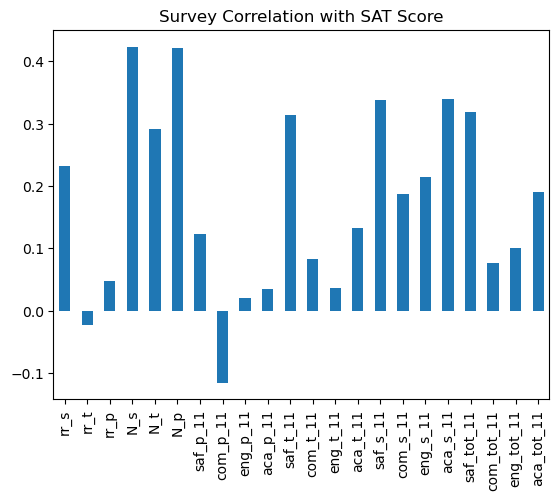

In [25]:
# Create the bar chart
# filter the correlation series with the desired survey fields
sat_score_plot = sat_corr[survey_fields]
sat_score_plot.plot.bar()
plt.title("Survey Correlation with SAT Score")
plt.show()

### Notes on SAT score correlation data
- Highest correlation is with the number of student (N_s) and parent (N_p) responders.  The number of teacher responders (N_t) also correlates relatively highly. This indicates that the level of interest in participating in the survey correlates with students achieveing higher SAT scores. 
- Next highest correlations are 'saf_t_11', 'saf_s_11', 'aca_s11' and 'saf_tot_11'.  'saf_t_11', 'saf_s_11' and 'saf_tot_11' are related to the safety and respect score from teachers and parents. Schools with higher safety and respect scores correlate with students achieving higher SAT scores. 
- Finally, academic expectations based on student responses correlates relativly highly.  Students who responded with saying that the school has high academic expectations achieve higher SAT scores.


### Invesigate Safety and SAT scores
- Create a scatter plot of these scores

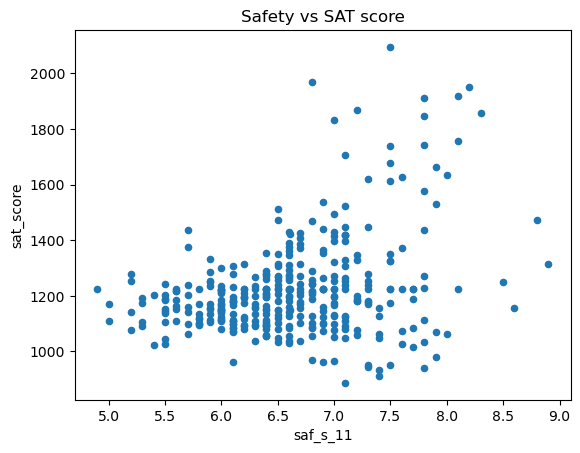

In [26]:
numeric_combined.plot.scatter(x='saf_s_11', y='sat_score', title='Safety vs SAT score')
plt.show()

## Safety vs SAT score
There are insights to infer from the safety and sat score scatterplot
- Majority of high SAT scores occur in schools where safety scores above 7.0
- Grouping of SAT scores spreads out if safety is scored higher
- SAT scores are more tightly grouped at lower SAT scores for low safety
- SAT scores are under 1600 for schools with safety scores below 6.5
#### In general, it is more likely to achieve higher SAT scores at schools with higher safety scores.


## Investigate safety and school Boroughs
The previous results lead us to look more closely at the safety of schools in different Boroughs
Steps include:
- Find the correct column name
- Create a list of boroughs
- Compute the average safety score for each borough

In [27]:
# Confirm the column name for the Boroughs (this didn't really help due to the truncation)
print(combined.columns)

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'SchoolName', 'AP Test Takers ',
       'Total Exams Taken',
       ...
       'priority05', 'priority06', 'priority07', 'priority08', 'priority09',
       'priority10', 'Location 1', 'lat', 'lon', 'school_dist'],
      dtype='object', length=160)


In [28]:
print(combined.info())  # just confirm the number of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Columns: 160 entries, DBN to school_dist
dtypes: float64(52), int64(11), object(97)
memory usage: 453.9+ KB
None


In [29]:
# use a .str.contains with 'bor' to find the name for the boroughs column
matching_column_names = combined.columns[combined.columns.str.contains('bor')].tolist()

In [30]:
print(matching_column_names) #it's 'boro'!

['boro']


In [31]:
print(combined[['boro','saf_tot_11']])  # take a look at the safety scores for each borough
print(combined['boro'].value_counts())


          boro  saf_tot_11
0    Manhattan         6.7
1    Manhattan         6.8
2    Manhattan         7.9
3    Manhattan         6.9
4    Manhattan         7.8
..         ...         ...
358   Brooklyn         6.7
359   Brooklyn         7.3
360   Brooklyn         6.9
361   Brooklyn         9.3
362   Brooklyn         7.4

[363 rows x 2 columns]
boro
Brooklyn         106
Bronx             93
Manhattan         90
Queens            64
Staten Island     10
Name: count, dtype: int64


In [32]:
# create a function that calculates the average safety score, test with one borough
t1 = combined['saf_tot_11'][combined['boro']=='Manhattan'].mean()

print(t1)

7.473333333333334


In [33]:
boroughs = combined['boro'].unique().tolist()  # create a list of the borough names
print(boroughs)

['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']


In [34]:
# Use series.apply() method to create a function that finds mean safety score of each Borough
# probably easiest to create a dictionary that has the borough as the key and the 
# average safety score as the value.
boro_safety = {}
for b in boroughs:
    boro_safety[b] = combined['saf_tot_11'][combined['boro']==b].mean()
    
print(boro_safety)

{'Manhattan': 7.473333333333334, 'Bronx': 7.32258064516129, 'Brooklyn': 7.129245283018867, 'Queens': 7.387499999999999, 'Staten Island': 7.2}


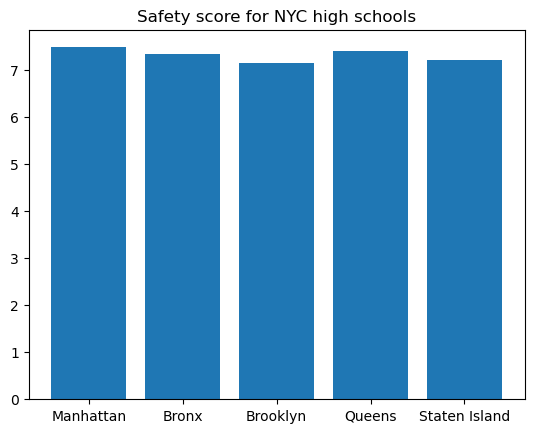

In [35]:
# Create a bar chart using Matplotlib.  
# we assign the categories and values from the dictionary.
plt.bar(boro_safety.keys(), boro_safety.values())
plt.title('Safety score for NYC high schools')
plt.show()

## Safety scores for NYC high schools
The mean safety scores do not vary significantly between each NYC Borough.  This could indicate that within each borough the safety scores varies between schools.
- Lowest score is Brooklyn at 7.2 and highest is Manhattan at 7.5


# Explore race and Sat scores in NYC high schools
Look at correlations between reported race/ethnicity and SAT scores


In [ ]:
# Programming steps
# create a list of the desired columns
# investigate the correlations for these values

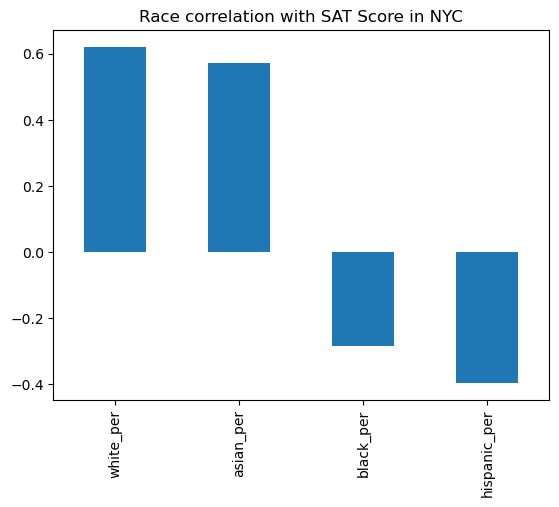

In [36]:
# Create list of relevant columns
race_fields = ['white_per', 'asian_per', 'black_per', 'hispanic_per']

# Filter the correlations table with the 'race_fields' list
sat_race_corr = sat_corr[race_fields]

# Create bar plot
sat_race_corr.plot.bar()
plt.title("Race correlation with SAT Score in NYC")
plt.show()

## Race and SAT score correlations
- There is a strong correlation with reported race and SAT scores.
- White and asian have a correlation of positive 0.5 to 0.6
- Black and hispanic have a correlation number of -0.2 and -0.4
There are many factors that could be related to this correlation, including, but not limited to: socio-economic opportunity, demographics, geography, underlying racism and others.

#### Explore the 'hispanic_per' and 'sat_score'

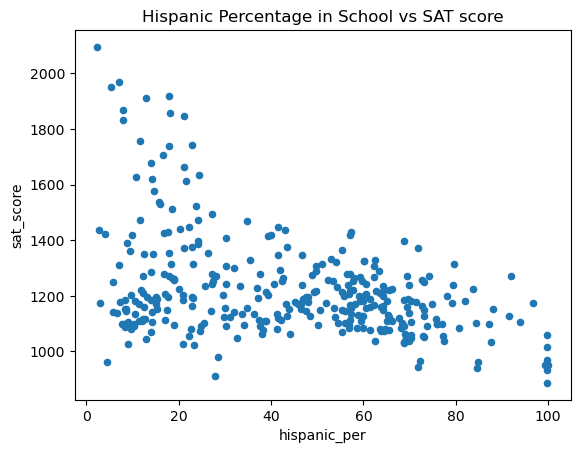

In [38]:
#Create a scatter plot of hispanic_per and sat_score
combined.plot.scatter(x='hispanic_per', y='sat_score', title='Hispanic Percentage in School vs SAT score')
plt.show()


## Observations from the scatter plot
There is a general trend for SAT scores to become lower as the hispanic percentage increases at a NYC school.  A number of schools that identify as 100% hispanic have scores between approximately 950 and 1100.  Schools that had the highest SAT scors can be grouped where the hispanic percentage is approximately less than 25%.  There is a much wider range of scores for these schools.
- Look more closely at schools with high percentage of hispanic students

In [42]:
print(combined['hispanic_per'])

0      53.8
1      45.9
2      55.4
3      56.9
4      14.2
       ... 
358    88.1
359    68.7
360    70.4
361    79.5
362    77.3
Name: hispanic_per, Length: 363, dtype: float64


In [43]:
# find names of schools where the hispanic percentage is greater than 95%
hispanic_schools = combined['SCHOOL NAME'][combined['hispanic_per'] > 95]

In [44]:
print(hispanic_schools)

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


#### The schools with greater than 95% hispanic percentage identify as international schools.  
These schools may cater to students who have english as a second language.  The SAT which relies on English proficiency could be putting these students at a disadvantage.


In [45]:
# find names of schools where hispanic % is less than 10% and sat score greater than 1800
other_schools = combined['SCHOOL NAME'][(combined['hispanic_per'] < 10)  & (combined['sat_score'] >1800)]

In [46]:
print(other_schools)

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


#### Schools with lower Hispanic percentage identify as focused on science and technology schools

### Reported gender and SAT scores
View the correlation data for reported gender and SAT scores

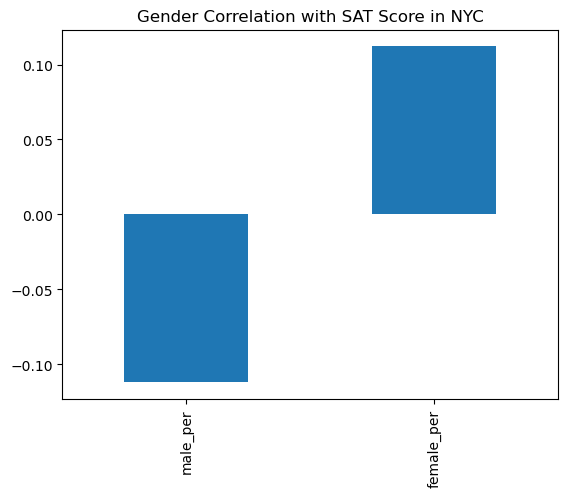

In [47]:
# filter by the gender percentage columns
sat_gender_corr = sat_corr[['male_per', 'female_per']]
sat_gender_corr.plot.bar()
plt.title("Gender Correlation with SAT Score in NYC")
plt.show()

### There is a weak correlation with gender and SAT scores
'male_per' have a slight negative correlation and 'female_per' has a slight positive correlation.
- The correlation score is weak enough to not be signficant
- Create a scatterplot of of female percentage vs SAT score for schools

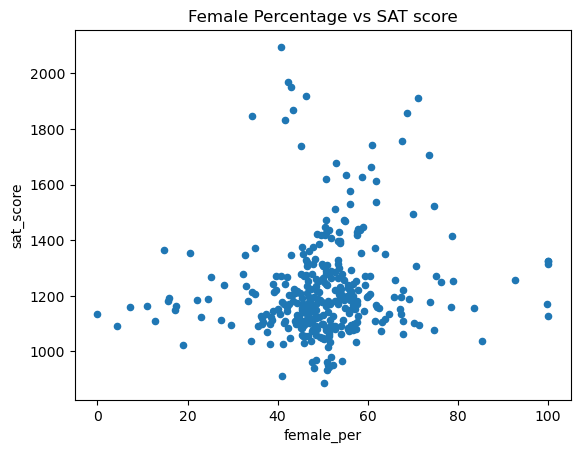

In [49]:
#Create a scatter plot of percentage of females and sat_score
combined.plot.scatter(x='female_per', y='sat_score', title='Female Percentage vs SAT score')
plt.show()

### Highest SAT scores occur in the range where female percentage is between 35% and 75%
- 'All-girls-school' does not perform significantly better than the all boys school
- Plot shows that coed schools perform better in terms of SAT schools where there is a mix of male and female
- Next step is to look at schools that have both a SAT scores and high female percentage

In [52]:
# find names of schools where female % is greater than 60% and sat score greater than 1700
female_per_schools = combined['SCHOOL NAME'][(combined['female_per'] > 60)  & (combined['sat_score'] > 1700)]

In [53]:
print(female_per_schools)

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


### Research into these schools show:
- These are college preparatory schools
- These are private schools
- Specialized in some programs and offer a lot of AP courses

### Explore AP course offerings and SAT scores

In [54]:
# Now explore AP scores and SAT scores
combined['ap_per']=combined['AP Test Takers ']/combined['total_enrollment']

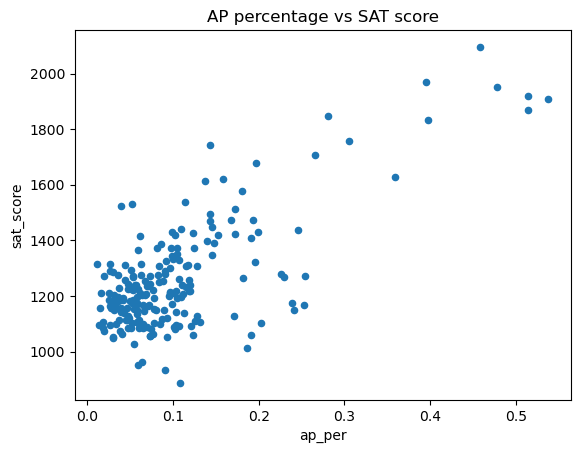

In [55]:
combined.plot.scatter(x='ap_per', y='sat_score', title='AP percentage vs SAT score')
plt.show()

### There is a general trend for high SAT scores if the percentage of students taking AP exams is higher.